In [1]:
from qiskit import QuantumCircuit, Aer, transpile,assemble
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation import CompleteMeasFitter, complete_meas_cal

C:\Users\Samarth\AppData\Local\Temp\ipykernel_7368\3136421867.py:3: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation import CompleteMeasFitter, complete_meas_cal


In [2]:
qc=QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2],[0,1,2])

In [3]:
backend=Aer.get_backend('qasm_simulator')
transpiled_qc=transpile(qc,backend)

In [4]:
qobj=assemble(transpiled_qc,shots=1000)
job=backend.run(qc)
result=job.result()
counts=result.get_counts()
raw_counts=job.result().get_counts()


In [5]:
cal_circuits,state_labels=complete_meas_cal(qubit_list=range(3))
cal_job=backend.run(qc)
cal_results=cal_job.result()
meas_fitter=CompleteMeasFitter(cal_results,state_labels)
mitigated_counts=meas_fitter.filter.apply(raw_counts)

In [6]:
print("Original counts:")
print(counts)

Original counts:
{'000': 546, '111': 478}


In [7]:
print("Mitigated counts:")
print(mitigated_counts)

Mitigated counts:
{'000': 128.03671702722565, '001': 128.0266553932596, '010': 127.93697618452073, '011': 128.05214026781033, '100': 127.9598854001403, '101': 128.01043943465285, '110': 127.92720392669841, '111': 128.04998236569202}


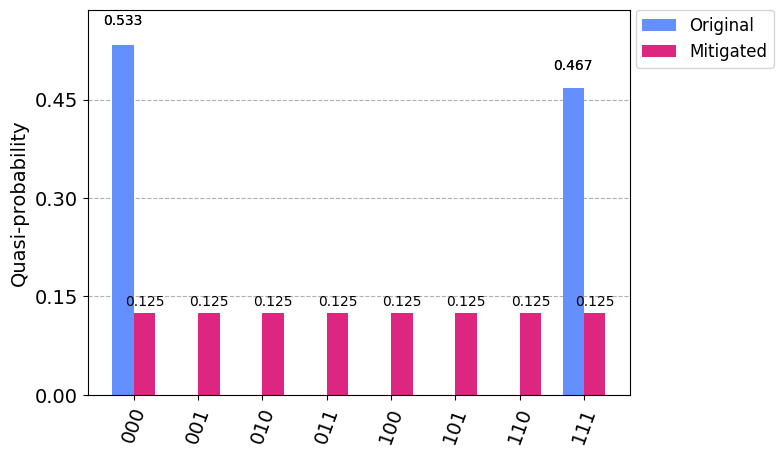

In [8]:
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])